In [1]:
%cd ../../..

/Users/ericrobertbrewer/Code/BYU/Suitability/book-analyzer


# bookcave_paragraphs

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

from python import folders
from python.sites.bookcave import bookcave
from python.text import STOPWORDS

## Features

Get the lengths of all the paragraphs.

In [3]:
def get_lengths(remove_stopwords=False):
    text_n_paragraphs = []
    text_paragraph_n_tokens = []
    fnames = os.listdir(os.path.join(folders.AMAZON_KINDLE_PARAGRAPH_TOKENS_PATH))
    for fname in fnames:
        if fname in {'.DS_Store'}:
            continue
        path = os.path.join(folders.AMAZON_KINDLE_PARAGRAPH_TOKENS_PATH, fname)
        n_paragraphs = 0
        paragraph_n_tokens = []
        with open(path, 'r', encoding='utf-8') as fd:
            n_sections = int(fd.readline()[:-1])
            for section_i in range(n_sections):
                section_n_paragraphs = int(fd.readline()[:-1])
                n_paragraphs += section_n_paragraphs
                for _ in range(section_n_paragraphs):
                    tokens = fd.readline()[:-1].split(' ')
                    if not remove_stopwords:
                        n_tokens = len(tokens)
                    else:
                        n_tokens = len([token for token in tokens if token not in STOPWORDS])
                    paragraph_n_tokens.append(n_tokens)
        text_n_paragraphs.append(n_paragraphs)
        text_paragraph_n_tokens.append(paragraph_n_tokens)
    
    return text_n_paragraphs, text_paragraph_n_tokens


def get_all_n_tokens(text_paragraph_n_tokens):
    all_n_tokens = []
    for paragraph_n_tokens in text_paragraph_n_tokens:
        for n_tokens in paragraph_n_tokens:
            all_n_tokens.append(n_tokens)
    
    return all_n_tokens

### Paragraphs

In [4]:
text_n_paragraphs, text_paragraph_n_tokens = get_lengths()
len(text_n_paragraphs), len(text_paragraph_n_tokens)

(7362, 7362)

What does the paragraph-length distribution look like?

In [5]:
min(text_n_paragraphs), max(text_n_paragraphs), sum(text_n_paragraphs) / len(text_n_paragraphs)

(0, 40126, 2371.9424069546317)

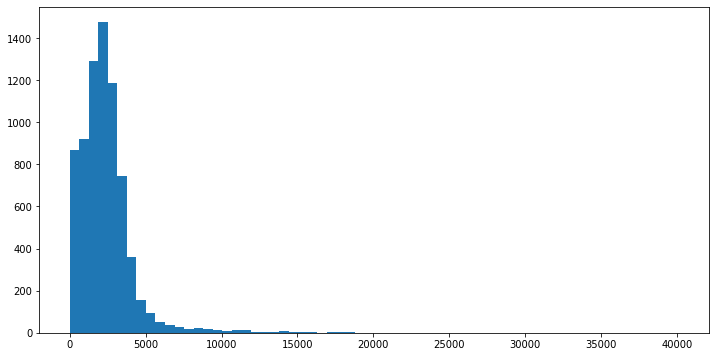

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(text_n_paragraphs, bins=64)
plt.show()

Get a better histogram of paragraph lengths without absurdly monstrous outliers.

In [7]:
text_n_paragraphs_8192 = np.array([n for n in text_n_paragraphs if n <= 8192])
len(text_n_paragraphs_8192), len(text_n_paragraphs_8192) / len(text_n_paragraphs)

(7225, 0.9813909263787014)

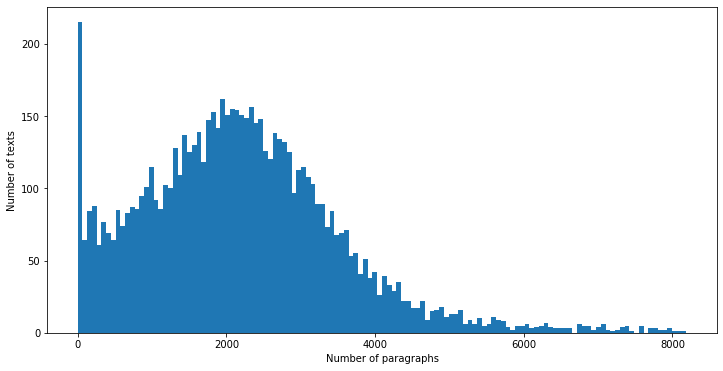

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(text_n_paragraphs_8192, bins=128)
plt.xlabel('Number of paragraphs')
plt.ylabel('Number of texts')
plt.savefig(os.path.join(folders.FIGURES_PATH, 'text_n_paragraphs_8192'), bbox_inches='tight')
plt.show()

Half of the `x` axis of the above histogram is still a long tail. Zoom in to the majority of texts.

In [9]:
text_n_paragraphs_4096 = np.array([n for n in text_n_paragraphs if n <= 4096])
len(text_n_paragraphs_4096), len(text_n_paragraphs_4096) / len(text_n_paragraphs)

(6688, 0.9084487910893779)

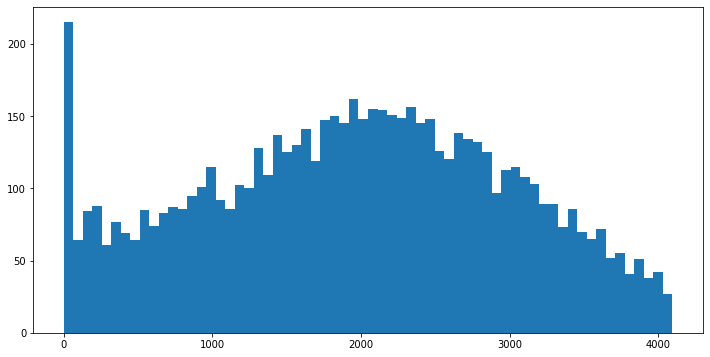

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(text_n_paragraphs_4096, bins=64)
# plt.savefig(os.path.join(folders.FIGURES_PATH, 'book_majority_paragraph_length'), bbox_inches='tight')
plt.show()

Try to find a reasonable range of paragraphs.

In [11]:
text_n_paragraphs_256_4096 = np.array([n for n in text_n_paragraphs if 256 <= n and n <= 4096])
len(text_n_paragraphs_256_4096), len(text_n_paragraphs_256_4096) / len(text_n_paragraphs)

(6237, 0.8471882640586798)

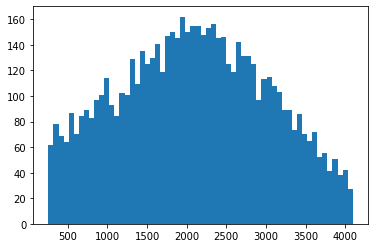

In [12]:
plt.hist(text_n_paragraphs_256_4096, bins=60)
plt.show()

### Tokens with stopwords

In [13]:
all_n_tokens = get_all_n_tokens(text_paragraph_n_tokens)
len(all_n_tokens)

17462240

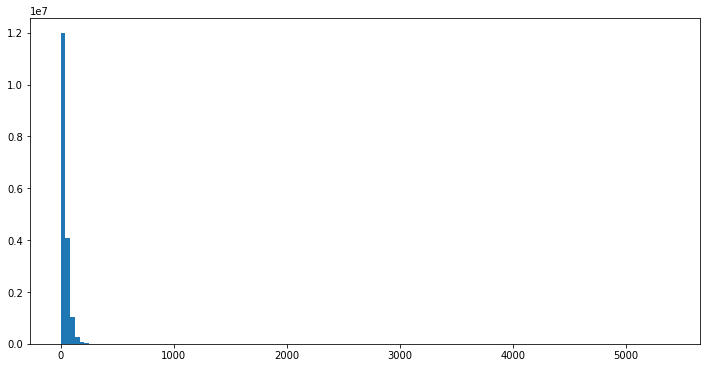

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(all_n_tokens, bins=128)
plt.show()

Zoom in.

In [15]:
all_n_tokens_1024 = [n for n in all_n_tokens if n <= 1024]
len(all_n_tokens_1024), len(all_n_tokens_1024) / len(all_n_tokens)

(17462149, 0.9999947887556235)

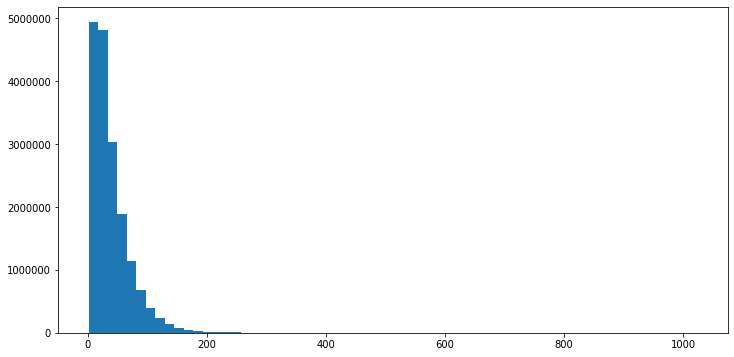

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(all_n_tokens_1024, bins=64)
plt.show()

Zoom in again.

In [17]:
all_n_tokens_192 = [n for n in all_n_tokens if n <= 192]
len(all_n_tokens_192), len(all_n_tokens_192) / len(all_n_tokens)

(17401193, 0.9965040567533145)

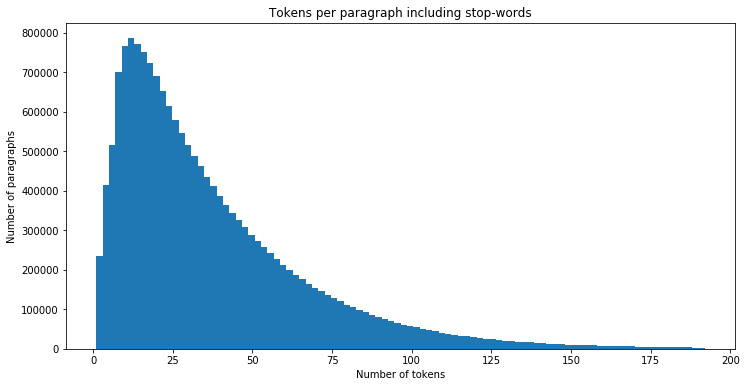

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(all_n_tokens_192, bins=96)
plt.title('Tokens per paragraph including stop-words')
plt.xlabel('Number of tokens')
plt.ylabel('Number of paragraphs')
plt.savefig(os.path.join(folders.FIGURES_PATH, 'all_n_tokens_192'))
plt.show()

In [19]:
all_n_tokens_128 = [n for n in all_n_tokens if n <= 128]
len(all_n_tokens_128), len(all_n_tokens_128) / len(all_n_tokens)

(17108718, 0.9797550600610231)

### Tokens without stopwords

In [20]:
_, text_paragraph_n_tokens_nostop = get_lengths(remove_stopwords=True)
len(text_paragraph_n_tokens_nostop)

7362

In [21]:
all_n_tokens_nostop = get_all_n_tokens(text_paragraph_n_tokens_nostop)
len(all_n_tokens_nostop)

17462240

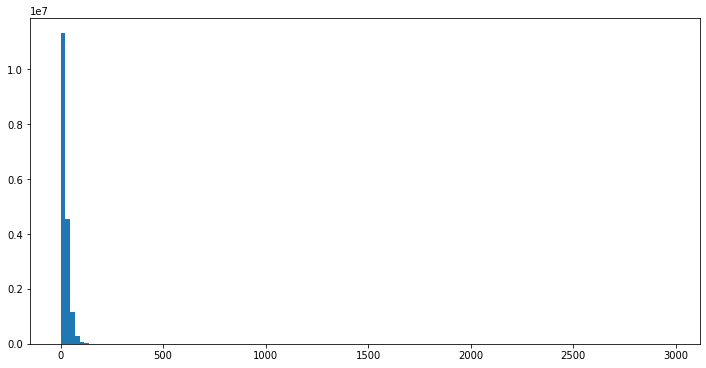

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(all_n_tokens_nostop, bins=128)
plt.show()

Zoom in.

In [23]:
all_n_tokens_nostop_1024 = [n for n in all_n_tokens_nostop if n <= 1024]
len(all_n_tokens_nostop_1024), len(all_n_tokens_nostop_1024) / len(all_n_tokens_nostop)

(17462216, 0.9999986256058787)

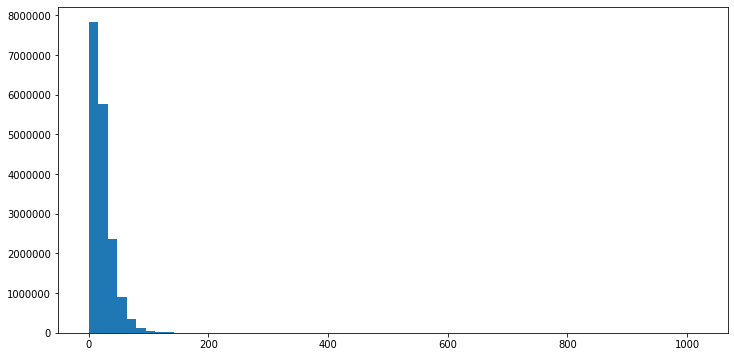

In [24]:
plt.figure(figsize=(12, 6))
plt.hist(all_n_tokens_nostop_1024, bins=64)
plt.show()

Zoom in again.

In [25]:
all_n_tokens_nostop_128 = [n for n in all_n_tokens_nostop if n <= 128]
len(all_n_tokens_nostop_128), len(all_n_tokens_nostop_128) / len(all_n_tokens_nostop)

(17435887, 0.9984908579884367)

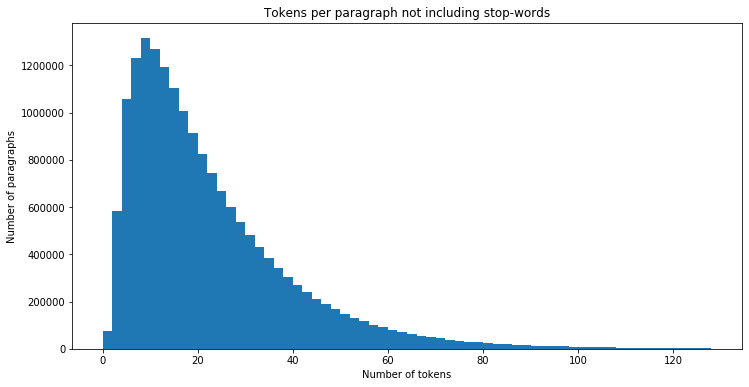

In [26]:
plt.figure(figsize=(12, 6))
plt.hist(all_n_tokens_nostop_128, bins=64)
plt.title('Tokens per paragraph not including stop-words')
plt.xlabel('Number of tokens')
plt.ylabel('Number of paragraphs')
plt.savefig(os.path.join(folders.FIGURES_PATH, 'all_n_tokens_nostop_128'))
plt.show()

In [27]:
all_n_tokens_nostop_64 = [n for n in all_n_tokens_nostop if n <= 64]
len(all_n_tokens_nostop_64), len(all_n_tokens_nostop_64) / len(all_n_tokens_nostop)

(16911163, 0.9684417921183078)